In [1]:
import pandas as pd
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [2]:
df = pd.read_csv('csv/cleaned_csv/iPhoneTweetsReaction_cleaned.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9801 non-null   object
 1   tweet        9801 non-null   object
 2   clean_tweet  9671 non-null   object
dtypes: object(3)
memory usage: 229.8+ KB


In [4]:
df.isna().sum()

id               0
tweet            0
clean_tweet    130
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9801 non-null   object
 1   tweet        9801 non-null   object
 2   clean_tweet  9671 non-null   object
dtypes: object(3)
memory usage: 229.8+ KB


In [6]:
analyzer = SentimentIntensityAnalyzer()

scores = []
for sentence in df['tweet']:
  score = analyzer.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

df['Compound'] = scores['compound']
df['Negative'] = scores['neg']
df['Neutral'] = scores['neu']
df['Positive'] = scores['pos']
df.head()

,id,tweet,clean_tweet,Compound,Negative,Neutral,Positive
0,1441435385154850817,Macro shot of the MagSafe Wallet on the iPhone...,macro shot magsafe wallet pro max super impress,0.7906,0.0,0.682,0.318
1,1441435374979588099,My iPhone 13 needs to hurry up cuz I don’t wan...,need hurry cuz wan na facetime,0.0000,0.0,1.000,0.000
2,1441435367408865281,The iPhone 13 Mini still gets slower MagSafe c...,mini still get slow magsafe charging speed,0.0000,0.0,1.000,0.000
3,1441435367245287431,@ATTexplore hope i win this new iPhone 13 befo...,attexplore hope win new christmas time,0.7717,0.0,0.717,0.283
4,1441435349482291203,TG 13 iPhone 13 Giveaway!!! https://t.co/QOMG...,tg giveaway,0.0000,0.0,1.000,0.000


In [7]:
sentiment = []

for i in range(len(df)):
  if (df['Compound'][i] < 0):
    sentiment.append("Negative")
  elif (df['Compound'][i] > 0):
    sentiment.append("Positive")
  else:
    sentiment.append("Neutral")
    
sentiment = pd.DataFrame(sentiment)
df['Sentiment'] = sentiment
df.head()

,id,tweet,clean_tweet,Compound,Negative,Neutral,Positive,Sentiment
0,1441435385154850817,Macro shot of the MagSafe Wallet on the iPhone...,macro shot magsafe wallet pro max super impress,0.7906,0.0,0.682,0.318,Positive
1,1441435374979588099,My iPhone 13 needs to hurry up cuz I don’t wan...,need hurry cuz wan na facetime,0.0000,0.0,1.000,0.000,Neutral
2,1441435367408865281,The iPhone 13 Mini still gets slower MagSafe c...,mini still get slow magsafe charging speed,0.0000,0.0,1.000,0.000,Neutral
3,1441435367245287431,@ATTexplore hope i win this new iPhone 13 befo...,attexplore hope win new christmas time,0.7717,0.0,0.717,0.283,Positive
4,1441435349482291203,TG 13 iPhone 13 Giveaway!!! https://t.co/QOMG...,tg giveaway,0.0000,0.0,1.000,0.000,Neutral


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9671 entries, 0 to 9800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9671 non-null   object 
 1   tweet        9671 non-null   object 
 2   clean_tweet  9671 non-null   object 
 3   Compound     9671 non-null   float64
 4   Negative     9671 non-null   float64
 5   Neutral      9671 non-null   float64
 6   Positive     9671 non-null   float64
 7   Sentiment    9671 non-null   object 
dtypes: float64(4), object(4)
memory usage: 680.0+ KB


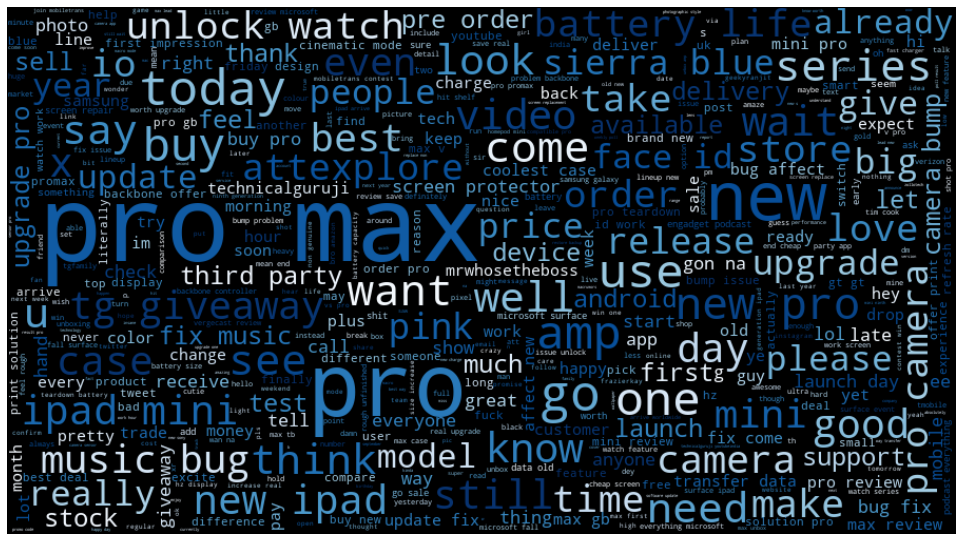

In [10]:
# WordCloud
all_words = ' '.join([text for text in df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
negative_df = df[df['Sentiment'] == 'Negative']

In [12]:
negative_df.head()

,id,tweet,clean_tweet,Compound,Negative,Neutral,Positive,Sentiment
13,1441435290405539852,iPhone 13 Pro Max sets record in smartphone ba...,pro max set record smart battery stress test ...,-0.4215,0.128,0.872,0.000,Negative
21,1441435229051367425,@ATTexplore @fitzymom11 ...,attexplore fitzymom include,-0.4981,0.159,0.841,0.000,Negative
29,1441435114479652870,Is it weird that I prefer iPhone 12's design m...,weird prefer design,-0.3939,0.210,0.790,0.000,Negative
36,1441434991599108108,Bro the way Instagram isn’t fitting in the iPh...,bro way instagram fitting piss instagram plea...,-0.4019,0.190,0.722,0.087,Negative
39,1441434969356705798,Actually the more I watch reviews and see the ...,actually watch review see series person reali...,-0.0644,0.053,0.879,0.068,Negative


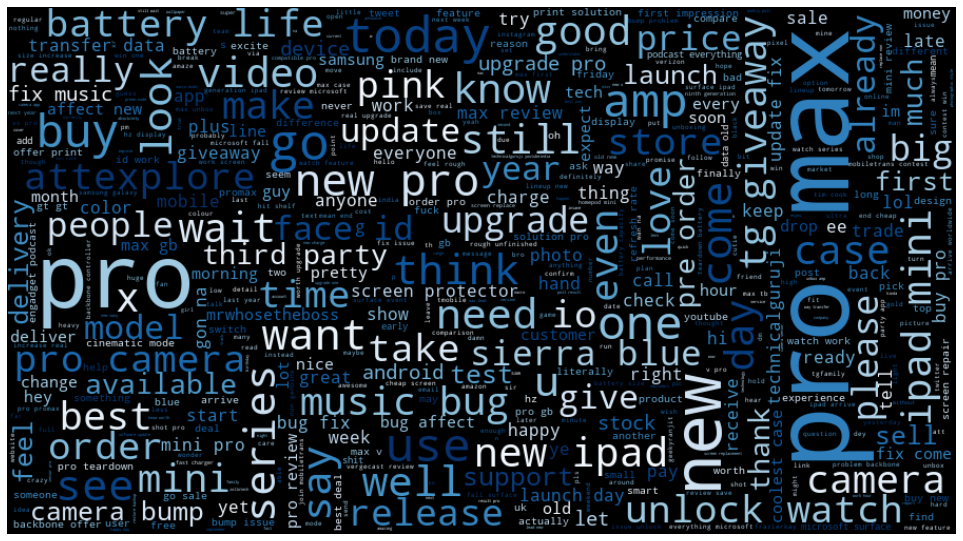

In [13]:
negative_words = ' '.join([text for text in negative_df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
positive_df = df[df['Sentiment'] == 'Positive']

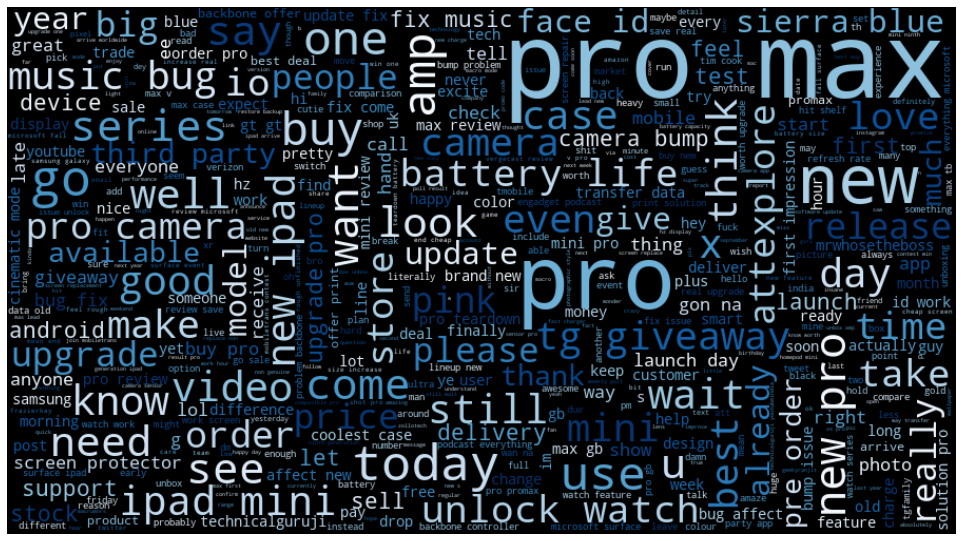

In [16]:
positive_words = ' '.join([text for text in positive_df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()